In [58]:
import numpy as np
import json
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [59]:
df = pd.read_csv('nom-fichier.csv')
df1 = pd.read_csv('model_data.csv')
df2 = pd.read_csv('emo_class.csv')

In [60]:
df

Unnamed: 0                    name genre  \
0               0     Ses01M_impro06_F000     F   
1               1     Ses01M_impro06_M000     M   
2               2     Ses01M_impro06_M001     M   
3               3     Ses01M_impro06_F001     F   
4               4     Ses01M_impro06_M002     M   
...           ...                     ...   ...   
10081       10081  Ses05M_script02_2_M038     M   
10082       10082  Ses05M_script02_2_F037     F   
10083       10083  Ses05M_script02_2_M039     M   
10084       10084  Ses05M_script02_2_F038     F   
10085       10085  Ses05M_script02_2_M040     M   

                                                     phr     time     val  \
0                                              You okay?   2.5845  3.0000   
1                                  Yeah, I'm just-- yeah   4.0467  3.0000   
2                      Just kind of feel numb, you know.   3.7092  3.0000   
3                                       What's happened?   3.1275  3.0000   
4                                  You didn't even hear?   4.3018  2.5000   
...                                                  ...      ...     ...   
10081        Are you still cold?  Still want to go home?   4.6700  3.3333   
10082   No.  I'm beginning to think you might be righ...  13.4800  3.6667   
10083   Shh.  If we're really quiet, the fish might c...   6.6300  4.0000   
10084                                            Or not.   2.0100  3.6667   
10085                                            Or not.   2.3078  4.0000   

          dom     act  emo  
0      2.0000  2.5000  neu  
1      2.0000  2.5000  sad  
2      3.0000  2.0000  sad  
3      2.5000  2.0000  neu  
4      2.0000  2.0000  sad  
...       ...     ...  ...  
10081  2.3333  2.6667  xxx  
10082  2.3333  2.6667  hap  
10083  2.6667  3.0000  xxx  
10084  2.3333  2.6667  hap  
10085  2.0000  2.3333  hap  

[10086 rows x 9 columns]

In [61]:
df1

Unnamed: 0                                               text       val  \
0             0                                          You okay?  0.147044   
1             1                              Yeah, I'm just-- yeah  0.093213   
2             2                  Just kind of feel numb, you know.  0.088872   
3             3                                   What's happened? -0.074273   
4             4                              You didn't even hear? -0.010724   
..          ...                                                ...       ...   
183         183   before your body rots and worms pop out of yo... -0.094965   
184         184   See, you know I don't care what you do.  You ... -0.156371   
185         185    Do you remember that row we did have in Venice? -0.006497   
186         186                              Which particular one?  0.022136   
187         187   Oh, Charles.  That was his name Charles. He d... -0.045233   

          aro       dom  emo  
0   -0.083684  0.116379  neu  
1   -0.156579 -0.011639  sad  
2   -0.066595 -0.014753  sad  
3   -0.065922  0.248252  neu  
4   -0.035145  0.013201  sad  
..        ...       ...  ...  
183 -0.114614  0.066494  fea  
184 -0.028629  0.080484  xxx  
185 -0.055573  0.105227  fea  
186 -0.219352  0.268704  fea  
187  0.009635  0.243854  xxx  

[188 rows x 6 columns]

In [62]:
df2

Unnamed: 0                                                phr  val  act  \
0             0                                          You okay?  3.0  2.5   
1             1                              Yeah, I'm just-- yeah  3.0  2.5   
2             2                  Just kind of feel numb, you know.  3.0  2.0   
3             3                                   What's happened?  3.0  2.0   
4             4                              You didn't even hear?  2.5  2.0   
..          ...                                                ...  ...  ...   
183         241   before your body rots and worms pop out of yo...  4.0  3.5   
184         242   See, you know I don't care what you do.  You ...  3.5  2.5   
185         246    Do you remember that row we did have in Venice?  4.0  2.5   
186         247                              Which particular one?  4.0  2.5   
187         249   Oh, Charles.  That was his name Charles. He d...  5.0  4.5   

     dom       emo  
0    2.0    others  
1    2.0   sadness  
2    3.0   sadness  
3    2.5    others  
4    2.0   sadness  
..   ...       ...  
183  2.5  exciting  
184  2.5     happy  
185  1.5     happy  
186  2.0  exciting  
187  3.0  exciting  

[188 rows x 6 columns]

In [63]:
filt = {'anger': 0, "disgusting":1, "exciting":2, "frustration":3, "fear" :4 , "happy" :5 ,"sadness" :6 , "surprised" :7 ,"others" :8}

In [64]:
df2['emo'] = df2['emo'].map(filt)

In [65]:
df1['emo'] = df2['emo']

In [66]:
dat = {'phr' :df1['text'] , 'val':df1['val'], 'act':df1['aro'],'dom':df1['dom'] , 'emo' : df2['emo'] }
data = pd.DataFrame(dat)
data.to_csv('result.csv')

In [67]:
data

phr       val       act  \
0                                            You okay?  0.147044 -0.083684   
1                                Yeah, I'm just-- yeah  0.093213 -0.156579   
2                    Just kind of feel numb, you know.  0.088872 -0.066595   
3                                     What's happened? -0.074273 -0.065922   
4                                You didn't even hear? -0.010724 -0.035145   
..                                                 ...       ...       ...   
183   before your body rots and worms pop out of yo... -0.094965 -0.114614   
184   See, you know I don't care what you do.  You ... -0.156371 -0.028629   
185    Do you remember that row we did have in Venice? -0.006497 -0.055573   
186                              Which particular one?  0.022136 -0.219352   
187   Oh, Charles.  That was his name Charles. He d... -0.045233  0.009635   

          dom  emo  
0    0.116379    8  
1   -0.011639    6  
2   -0.014753    6  
3    0.248252    8  
4    0.013201    6  
..        ...  ...  
183  0.066494    2  
184  0.080484    5  
185  0.105227    5  
186  0.268704    2  
187  0.243854    2  

[188 rows x 5 columns]

In [68]:
labels = list(filt.keys())

In [94]:
len(labels)

9

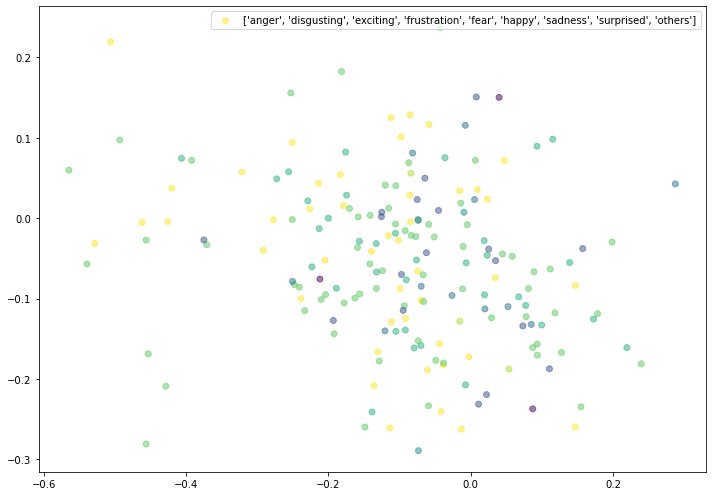

In [86]:
df3 = data
plt.rcParams['figure.figsize'] = [10.0, 7.]
plt.rcParams['figure.autolayout'] = True
plt.scatter(df3['val'], df3['act'], c=df3['emo'], label = labels, alpha=0.5)
plt.legend()
plt.show()

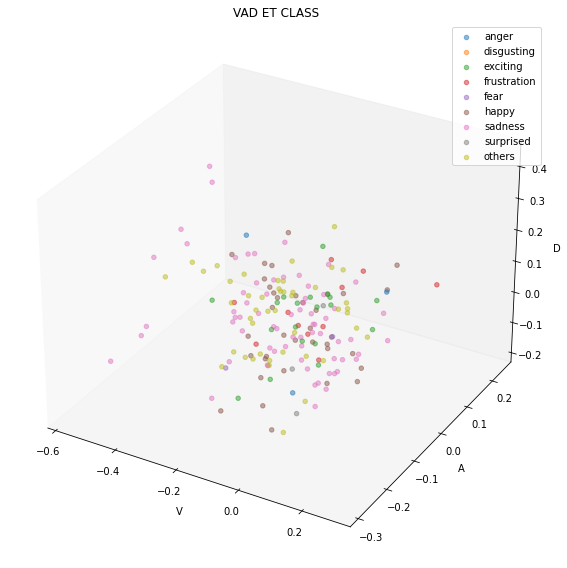

In [104]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.autolayout'] = True
t = np.arange(1,101)
fig = plt.figure()
ax = plt.axes(projection ="3d")
#ax.plot3D(t[0:10],df4['val'][0:10],df4['aro'][0:10])
l = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive']
for i in range(9):
    d = df3[df3['emo']== i]
    c = np.ones(len(d))*i
    ax.scatter3D(d['val'],d['act'],d['dom'], c=l[i], label = labels[i], alpha=0.5)
ax.set_title("VAD ET CLASS")
ax.set_xlabel("V")
ax.set_ylabel("A")
ax.set_zlabel("D")
ax.grid(False)
plt.legend()
plt.show()

In [99]:
np.ones(5)

array([1., 1., 1., 1., 1.])